# Objectives
Last article introduced some basic descriptive statistics such as measures of central tendency and measures of variation. In this article we will apply some measures to get a better understanding of selected datasets. Datasets we're using are Road Safety Data for accidents between 2016-2018 that is available on <a href="https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data">data.gov.uk</a>. You'll probably want to look at *Variable lookup data guide* on the website as well, since some of variables are coded into numbers.

# Setup
One of quickest way to use python and packages is to install <a href="https://www.anaconda.com/products/individual" target="_blank" rel="noreferrer noopener">Anaconda</a>. Then go to **Environments** and change the dropdown menu from *installed* to *all*, search and install packages <a href="https://pandas.pydata.org/" target="_blank" rel="noreferrer noopener">pandas</a>, <a href="https://docs.scipy.org/doc/numpy/reference/" target="_blank" rel="noreferrer noopener">numpy</a> and <a href="https://seaborn.pydata.org/index.html" target="_blank" rel="noreferrer noopener">seaborn</a>. Once you've done this, open either **JupyterLab** or **Notebook** at the home page and create a new *ipynb* file. Make sure datasets are placed in the same directory as the file.

In [127]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline
plt.rcParams['figure.figsize'] = [11.7, 8.17]

Datasets were renamed to *acc_2016.csv*, *acc_2017.csv*, and *acc_2018.csv*. In here, we can concatnate them into one single dataframe.

In [128]:
years = [2016, 2017, 2018]
file_list = []
for year in years:
    df = pd.read_csv("acc_" + str(year) + ".csv", parse_dates=[9, 11])
    df["Year"] = year
    file_list.append(df)

df_acc = pd.concat(file_list)
df_acc.columns

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

The dataset has columns:  
['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 
'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 
'1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 
'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 
'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 
'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location', 
'Year'].  
To see more details about the dataset, use **df_acc** and **df_acc.dtypes**.

If you look at datsets closely then you'll find some variables such as *Weather_Conditions* and *Road_Type* are coded in numbers, in here we transform numbers back to text according to *Variable lookup data guide* mentioned at the beginning. Backward slashes are used to indent code in new lines.

In [129]:
df_acc['Weather_Conditions'] = df_acc['Weather_Conditions'] \
    .map({1: "Fine no high winds", 2: "Raining no high winds", \
          3: "Snowing no high winds", 4: "Fine + high winds", \
          5: "Raining + high winds", 6: "Snowing + high winds", \
          7: "Fog or mist", 8: "Other", 9: "Unknown", \
          -1: "Data missing or out of range"})

df_acc['Road_Type'] = df_acc['Road_Type'] \
    .map({1: "Roundabout", 2: "One way street", 3: "Dual carriageway", \
          6: "Single carriageway", 7: "Slip road", 9: "Unknown", \
          12: "One way street/Slip road", -1: "Data missing or out of range"})

# Accidents by year, week, and day

Start with time and date, we can use barplot to visualise number of accidents by year, week, and day. From the plot below, we can see that the number of accidents decreases over three years period.

Text(0.5, 1.0, 'Number of accidents for each year 2016-2018')

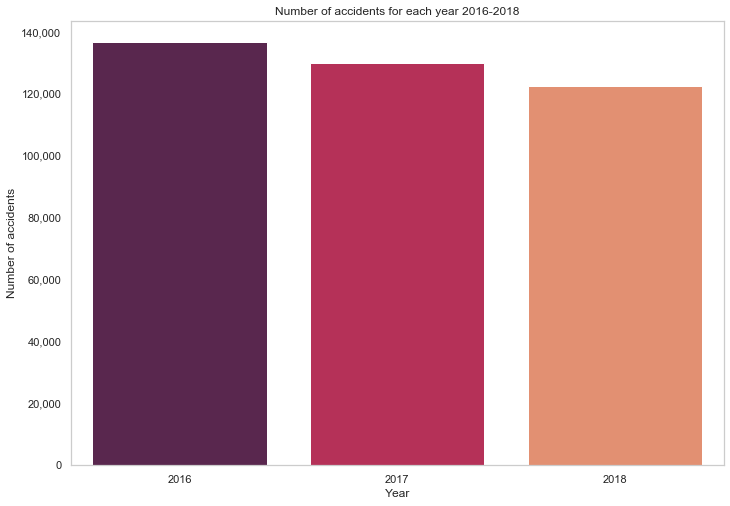

In [130]:
# count number of accident for each year, sort by year, make index a new column
df_byYear = pd.DataFrame(df_acc.Year.value_counts().sort_index()).reset_index()
df_byYear.columns = ["Year", "Number of accidents"]

# plot, add seperator for thousands, add title
plot = sns.barplot(x="Year", y="Number of accidents", palette="rocket", data=df_byYear)
plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.set_title("Number of accidents for each year 2016-2018")

The distribution of accidents by day of the week looks a bit more interesting - more accidents occured on days towards weekend. Working days has higher number of accidents and over a sixth of overall accidents occured on Friday.

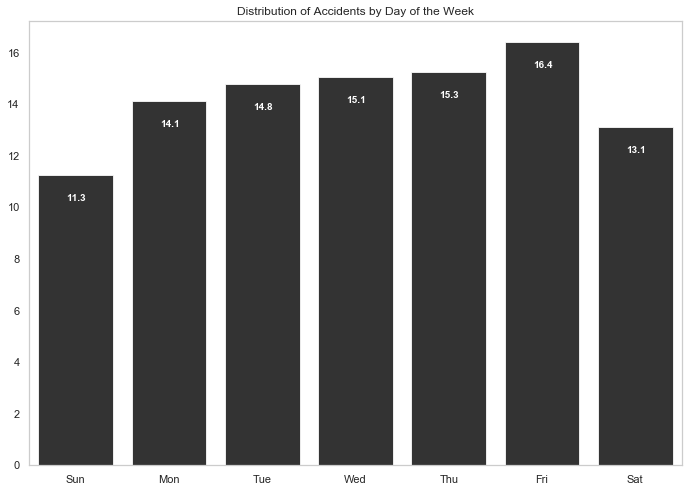

In [131]:
# calculate proportion of accidents for each day of the week.
Week_Days = df_acc["Day_of_Week"].value_counts().sort_index()/len(df_acc)*100
Week_Days.index = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
sns.barplot(Week_Days.index, Week_Days.values, alpha=0.8, color="black")
plt.title("Distribution of Accidents by Day of the Week")
for i, val in enumerate(Week_Days.values):
    plt.text(i-0.1, val-1,  str( "{:.{}f}".format( val, 1 )), color='white', fontweight='bold')

Most accidents occured around communte time.

Text(0, 0.5, 'Number of Accidents')

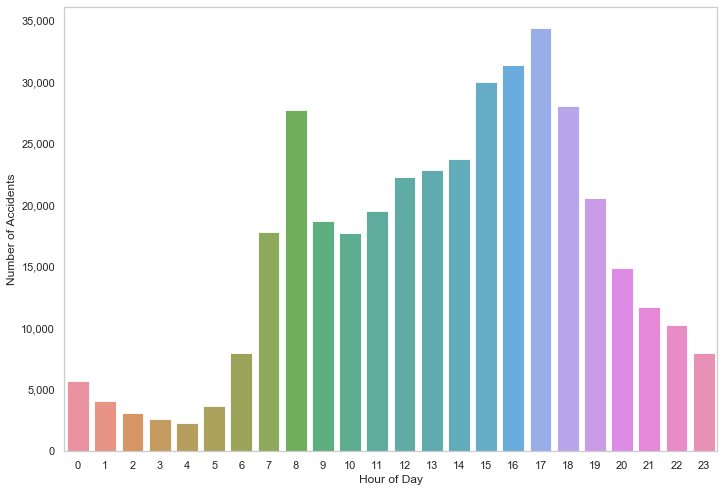

In [132]:
acc_by_time = df_acc.Time.value_counts()
acc_by_hour = acc_by_time.groupby(acc_by_time.index.hour).sum()
sns.barplot(acc_by_hour.index, acc_by_hour.values, alpha=0.86, palette="husl") \
    .get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")

What if we sort it by hour?

Text(0, 0.5, 'Number of Accidents')

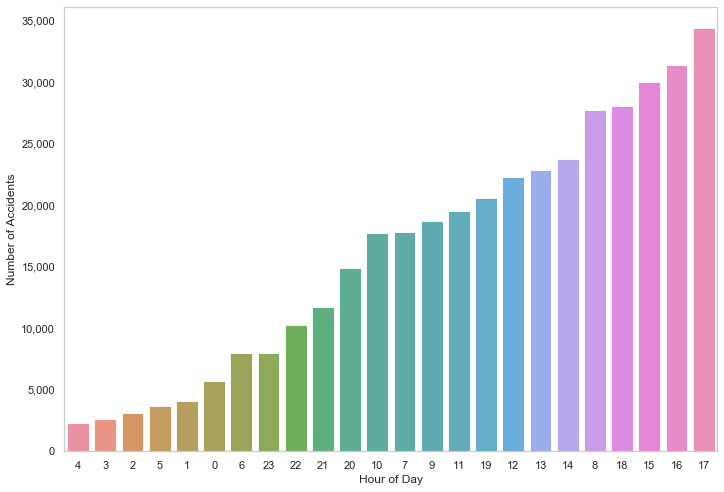

In [133]:
acc_by_hour_sorted = acc_by_hour.sort_values()
sns.barplot(acc_by_hour_sorted.index, acc_by_hour_sorted.values, order=acc_by_hour_sorted.index , alpha=0.86, palette="husl") \
    .get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")

Now we look at density distrbutions to see average, median and standard deviation of number of accidents for each year. The plot has also includes the day of which the highest number of accident occured (mostly on Friday).

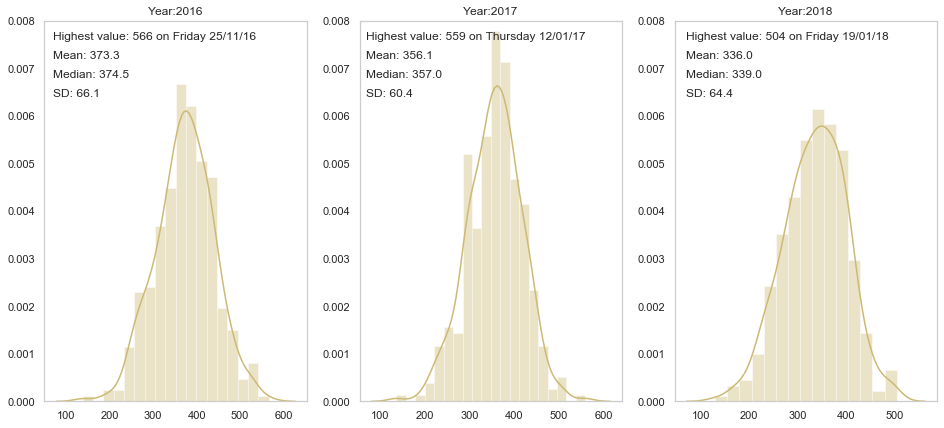

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,7))
sns.set_color_codes()

for i, col in enumerate(df_acc["Year"].unique()):

    acc_per_year = df_acc["Date"].loc[col == df_acc["Year"]].value_counts()
    acc_per_year_value = acc_per_year.sort_values()[-1]
    acc_per_year_index = acc_per_year.sort_values().index[-1].strftime("%A %d/%m/%y")

    ax[i].set_ylim([0.0,0.008])
    sns.distplot(acc_per_year.values,  ax=ax[i], color="y")
    ax[i].title.set_text("Year:" + str(col))
    ax[i].text(70, 0.0076,'Highest value:'+ str( " {} on {} ".format( acc_per_year_value, acc_per_year_index )), fontsize=12)
    ax[i].text(70, 0.0072,'Mean:'+ str( "{: .{}f}".format( acc_per_year.mean(), 1 )), fontsize=12)
    ax[i].text(70, 0.0068,'Median:'+ str( "{: .{}f}".format( acc_per_year.median(), 1 )), fontsize=12)
    ax[i].text(70, 0.0064,'SD:'+ str( "{: .{}f}".format( acc_per_year.std(), 1 )), fontsize=12)
    

plt.show()

We can also use boxplot to illustrate the outliers, minimum, maximum, median and quartiles.

Text(0.5, 1.0, 'Box plots - a different representation for distribution of number of accidents occured each year')

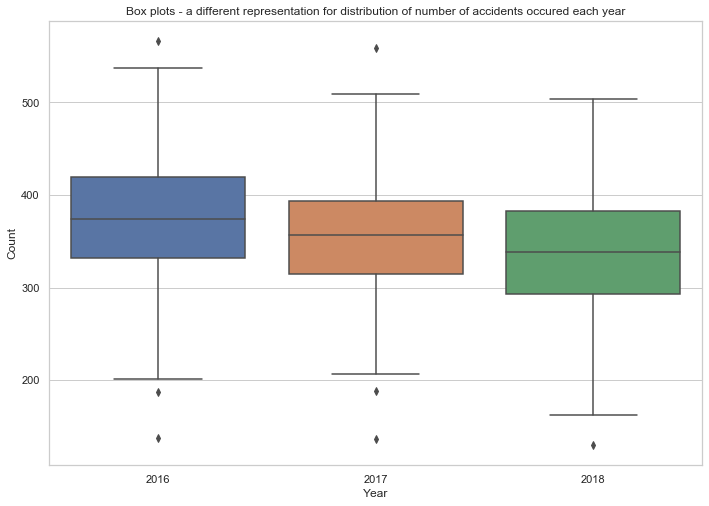

In [135]:
sns.set(style="whitegrid")
df_box = []
for i, col in enumerate(df_acc["Year"].unique()):

    acc_per_year = pd.DataFrame(df_acc["Date"].loc[col == df_acc["Year"]].value_counts().reset_index())
    acc_per_year.columns = ["Date", "Count"]
    acc_per_year["Year"] = col
    df_box.append(acc_per_year)
    
box_data = pd.concat(df_box)
sns.boxplot(x="Year", y="Count", data=box_data)
plt.title("Box plots - a different representation for distribution of number of accidents occured each year")

# Conditions

Now we look at some categorical variables such as *Weather_Conditions*, *Road_Type* and *Accident_Severity*.

Count number of accidents under each weather condition.

In [136]:
sns.set_style("whitegrid", {'axes.grid' : False})
df_wc = df_acc.Weather_Conditions.value_counts()
df_wc[0]/len(df_acc)*100

81.22845148726486

*Fine no high winds* condition appeared in over 80% of all accidents, what about other conditions?  

[Text(0, 0, 'Raining no high winds'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Raining + high winds'),
 Text(0, 0, 'Fine + high winds'),
 Text(0, 0, 'Snowing no high winds'),
 Text(0, 0, 'Fog or mist'),
 Text(0, 0, 'Snowing + high winds'),
 Text(0, 0, 'Data missing or out of range')]

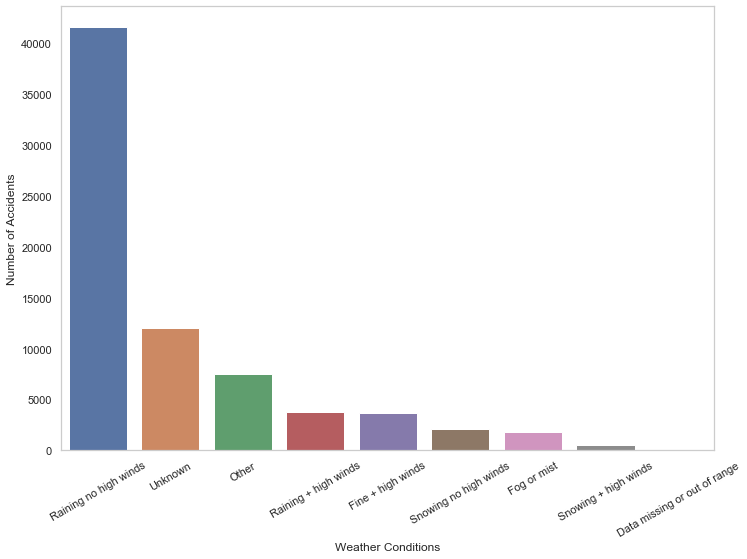

In [137]:
df_wc = df_wc.drop("Fine no high winds")
plot_wc = sns.barplot(df_wc.index, df_wc.values)
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plot_wc.set_xticklabels(plot_wc.get_xticklabels(), rotation=30)

Let's do the same for road types.

[Text(0, 0, 'Single carriageway'),
 Text(0, 0, 'Dual carriageway'),
 Text(0, 0, 'Roundabout'),
 Text(0, 0, 'One way street'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Slip road'),
 Text(0, 0, 'Data missing or out of range')]

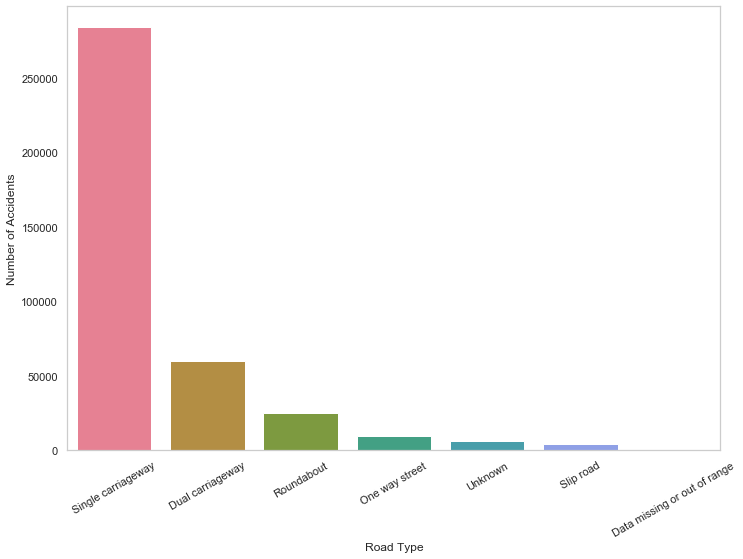

In [138]:
df_rt = df_acc.Road_Type.value_counts()
plot_rt = sns.barplot(df_rt.index, df_rt.values, palette="husl")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plot_rt.set_xticklabels(plot_rt.get_xticklabels(), rotation=30)

Base on *Road_Type*, let's find out accident servity for each road.

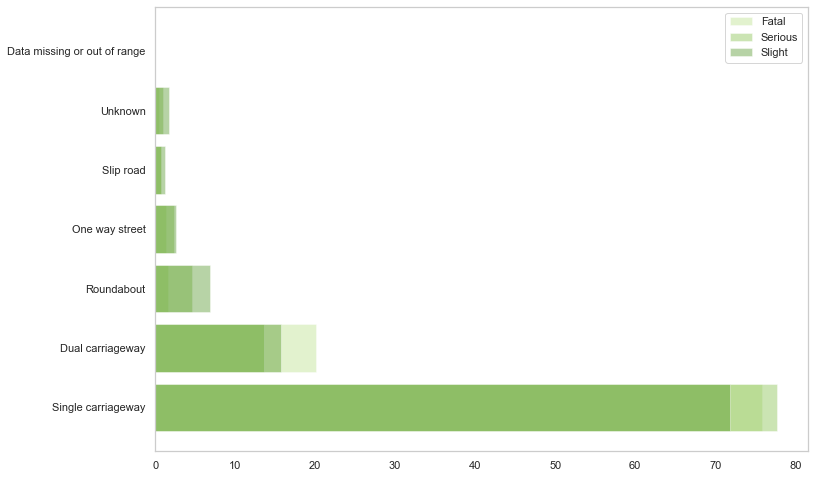

In [139]:
acc_sev = { 1: "Fatal", 2: "Serious", 3: "Slight" }
category_colors = plt.get_cmap('PiYG')(np.linspace(0.7, 0.9, 3))

for i in range(1, 4):
    df_rt_sev = df_acc["Road_Type"].loc[df_acc["Accident_Severity"]==i].value_counts()
    df_rt_sev = (df_rt_sev/df_rt_sev.sum())*100
    plt.barh(df_rt_sev.index.astype(str), df_rt_sev.values, alpha=0.40, label=acc_sev[i], color=category_colors[(i-1)])
    
plt.legend()
plt.show()

# Scatterplot

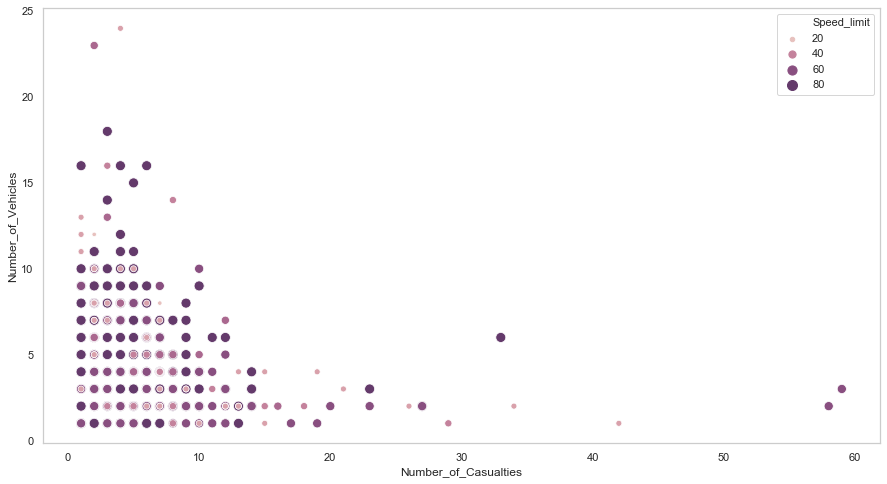

In [140]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(15,8))
data = df_acc[df_acc["Year"] == 2018]
sns.scatterplot(y="Number_of_Vehicles", x="Number_of_Casualties", hue="Speed_limit", data=df_acc, size="Speed_limit", sizes=(20, 100), palette=cmap)